# US Births dataset - Guided Project <a class="tocSkip">

Guided project from [dataquest.io](https://www.dataquest.io/m/9/guided-project-explore-u-s-births) Data Scientist path.

Data provided by [fivethirtyeight](https://github.com/fivethirtyeight/data/tree/master/births).

---

# Import data

In [1]:
from pathlib import Path

my_file = Path('US_births_1994-2003_CDC_NCHS.csv')
if my_file.is_file():
    print('File exists.')
    data = open('US_births_1994-2003_CDC_NCHS.csv', 'r').read()
    data_lst = data.split('\n')
else:
    print("File doesn't exist, will be downloaded.")
    import urllib.request
    url = 'https://raw.githubusercontent.com/fivethirtyeight/' + \
          'data/master/births/US_births_1994-2003_CDC_NCHS.csv'
    response = urllib.request.urlopen(url)
    data = response.read().decode('utf-8')
    with open('US_births_1994-2003_CDC_NCHS.csv', 'w') as file:
        file.write(data)
    data_lst = data.split('\r')

File doesn't exist, will be downloaded.


In [2]:
print(data_lst[:10])

['year,month,date_of_month,day_of_week,births', '1994,1,1,6,8096', '1994,1,2,7,7772', '1994,1,3,1,10142', '1994,1,4,2,11248', '1994,1,5,3,11053', '1994,1,6,4,11406', '1994,1,7,5,11251', '1994,1,8,6,8653', '1994,1,9,7,7910']


In [3]:
def read_csv(filename):
    data = open(filename, 'r').read()
    string_list = data.split('\n')
    
    final_list = []
    for item in string_list[1:]:
        int_fields = []
        string_fields = item.split(',')
        int_fields = list(map(lambda x: int(x), string_fields))
        final_list.append(int_fields)
    return final_list

In [4]:
cdc_list = read_csv('US_births_1994-2003_CDC_NCHS.csv')

In [5]:
print(cdc_list[:10])

[[1994, 1, 1, 6, 8096], [1994, 1, 2, 7, 7772], [1994, 1, 3, 1, 10142], [1994, 1, 4, 2, 11248], [1994, 1, 5, 3, 11053], [1994, 1, 6, 4, 11406], [1994, 1, 7, 5, 11251], [1994, 1, 8, 6, 8653], [1994, 1, 9, 7, 7910], [1994, 1, 10, 1, 10498]]


---

# Cleanup

In [6]:
def month_births(lst):
    births_per_month = {}
    
    for item in lst:
        month = item[0]
        births = item[-1]
        if month in births_per_month:
            births_per_month[month] += births
        else:
            births_per_month[month] = births
    
    return births_per_month

In [7]:
cdc_month_births = month_births(cdc_list)

In [8]:
print(cdc_month_births)

{2000: 4058814, 2001: 4025933, 2002: 4021726, 2003: 4089950, 1994: 3952767, 1995: 3899589, 1996: 3891494, 1997: 3880894, 1998: 3941553, 1999: 3959417}


In [9]:
def dow_births(lst):
    births_per_day = {}
    
    for item in lst:
        day_of_week = item[-2]
        births = item[-1]
        if day_of_week in births_per_day:
            births_per_day[day_of_week] += births
        else:
            births_per_day[day_of_week] = births
    
    return births_per_day

In [10]:
cdc_day_births = dow_births(cdc_list)

In [11]:
print(cdc_day_births)

{1: 5789166, 2: 6446196, 3: 6322855, 4: 6288429, 5: 6233657, 6: 4562111, 7: 4079723}


In [12]:
def calc_counts(data, column):
    feature_count = {}
    
    for item in data:
        feature = item[column]
        births = item[-1]
        if feature in feature_count:
            feature_count[feature] += births
        else:
            feature_count[feature] = births
    
    return feature_count

In [13]:
cdc_year_births  = calc_counts(cdc_list, 0)
cdc_month_births = calc_counts(cdc_list, 1)
cdc_dom_births   = calc_counts(cdc_list, 2)
cdc_dow_births   = calc_counts(cdc_list, 3)

In [14]:
print('### Year ###')
print(cdc_year_births)
print('---')
print('### Month ###')
print(cdc_month_births)
print('---')
print('### Day of month ###')
print(cdc_dom_births)
print('---')
print('### Day of week ###')
print(cdc_dow_births)

### Year ###
{2000: 4058814, 2001: 4025933, 2002: 4021726, 2003: 4089950, 1994: 3952767, 1995: 3899589, 1996: 3891494, 1997: 3880894, 1998: 3941553, 1999: 3959417}
---
### Month ###
{1: 3232517, 2: 3018140, 3: 3322069, 4: 3185314, 5: 3350907, 6: 3296530, 7: 3498783, 8: 3525858, 9: 3439698, 10: 3378814, 11: 3171647, 12: 3301860}
---
### Day of month ###
{1: 1276557, 2: 1288739, 3: 1304499, 4: 1288154, 5: 1299953, 6: 1304474, 7: 1310459, 8: 1312297, 9: 1303292, 10: 1320764, 11: 1314361, 12: 1318437, 13: 1277684, 14: 1320153, 15: 1319171, 16: 1315192, 17: 1324953, 18: 1326855, 19: 1318727, 20: 1324821, 21: 1322897, 22: 1317381, 23: 1293290, 24: 1288083, 25: 1272116, 26: 1284796, 27: 1294395, 28: 1307685, 29: 1223161, 30: 1202095, 31: 746696}
---
### Day of week ###
{1: 5789166, 2: 6446196, 3: 6322855, 4: 6288429, 5: 6233657, 6: 4562111, 7: 4079723}


---

# Next steps

In [15]:
# the lazy approach
def min_dict(summary):
    return min(summary.values())

def max_dict(summary):
    return max(summary.values())

In [16]:
print('Minimum births per year: %i' % min_dict(cdc_year_births))
print('Maximum births per year: %i' % max_dict(cdc_year_births))

Minimum births per year: 3880894
Maximum births per year: 4089950


In [17]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('ggplot')

In [18]:
cdc_year_births_sorted = sorted(cdc_year_births.items())
x, y = zip(*cdc_year_births_sorted)

In [19]:
ann_x = []

for i in range(len(x)):
    temp = (y[i] - y[i-1]) / y[i-1] * 100
    temp = temp * 100
    ann_x.append(int(temp))

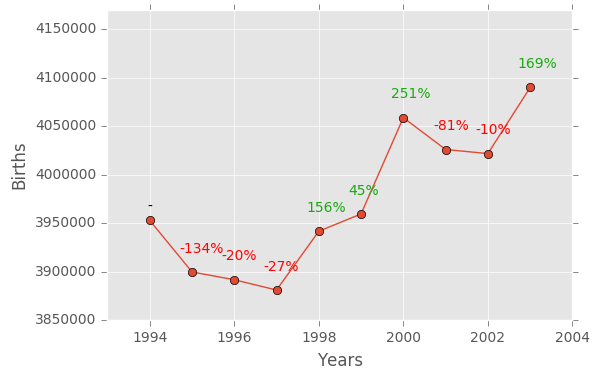

In [20]:
plt.plot(x, y, '-o')
plt.xlim([1993, 2004]) # , 0, 20
plt.ylim([3850000, 4170000])
plt.xlabel('Years')
plt.ylabel('Births')

plt.annotate('-',xy=(x[0] - 0.05, y[0]+10000))
             
for i in range(len(x))[1:]:
    if ann_x[i] > 0:
        col = '#17aa0c'
    else:
        col = '#ff0000'
    plt.annotate(str(ann_x[i]) + '%', color=col,
                 xy=(x[i], y[i]+10000),
                 xytext=(x[i]-0.3, y[i]+20000),
                 #arrowprops=dict(facecolor='black')
    )
#plt.show()

Further proposals ([source](https://www.dataquest.io/m/9/guided-project-explore-u-s-births/6/next-steps)):
+ "For example, how did the number of births on Saturday change each year between 1994 and 2003?"
+ "Find a way to combine the CDC data with the SSA data, which you can find here. Specifically, brainstorm ways to deal with the overlapping time periods in the datasets."

---